<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

$$\widehat{w} = (X^T X)^{-1}X^T y,$$

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [23]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [25]:
X.head()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [26]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

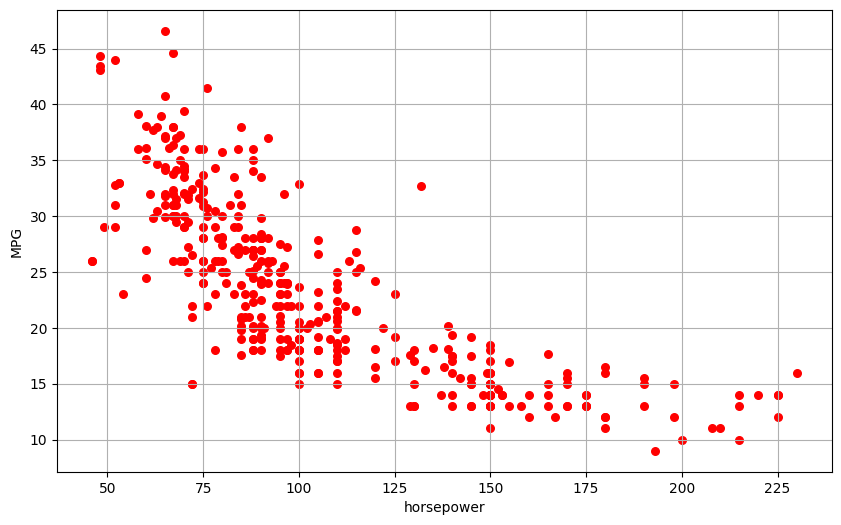

In [27]:
import matplotlib.pyplot as plt


def visualiza(X, y, name):
    '''Recibe dataframes de features, target y un nombre de variable y dibuja la gráfica de puntos'''
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X[name], y['mpg'], s=30, c='red')
    plt.xlabel(str(name))
    plt.ylabel('MPG')
    plt.grid(True)
    plt.show()
    

visualiza(X, y, 'horsepower')

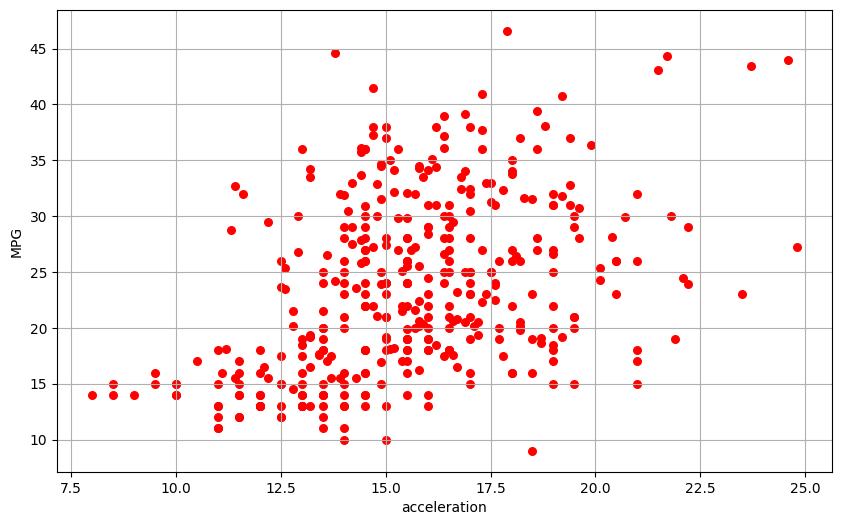

In [28]:
visualiza(X, y, 'acceleration')

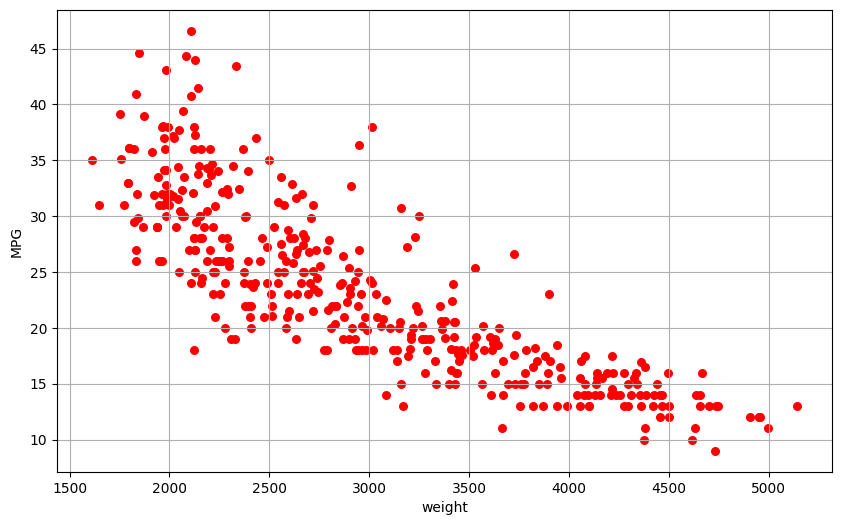

In [29]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [30]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
       
    # Comprueba que las dimensiones son adecuadas y corrige si no es así
    if X.shape[0] < X.shape[1]:
        
        X = X.T # transponer X para que las columnas sean las observaciones. (transforma y vencerás).

    # Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 

    ones = np.ones((X.shape[0], 1))
    Xm = np.hstack((ones, X))
    Xmt = np.transpose(Xm)
    inv = np.linalg.inv(np.dot(Xmt, Xm))
    
    # Calcula los pesos
    w = inv @ Xmt @ y
    return w

In [31]:
# Array de prueba!!
Xi = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
yi = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

,mpg
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN


Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [32]:
# Aplica el modelo y dibuja la recta junto con los datos

# convertir df en np.arrays (matrices)
print(X)
Xw = np.array(X.loc[:, ['weight']]) # selecciono un df con sólo la columna de pesos de X y lo convierto a array de numpy
y = np.array(y) # convierto 'y' a array de numpy 

# compruebo tipo y dimensiones de Xw y y.
print(y.shape)
print(Xw.shape)
type(y)
type(Xw)

     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

numpy.ndarray

In [33]:
# Aplico el modelo en con los datos de peso del data frame para obtener W.
W = pesos_ols(Xw, y)
W

array([[ 4.63173644e+01],
       [-7.67661006e-03]])

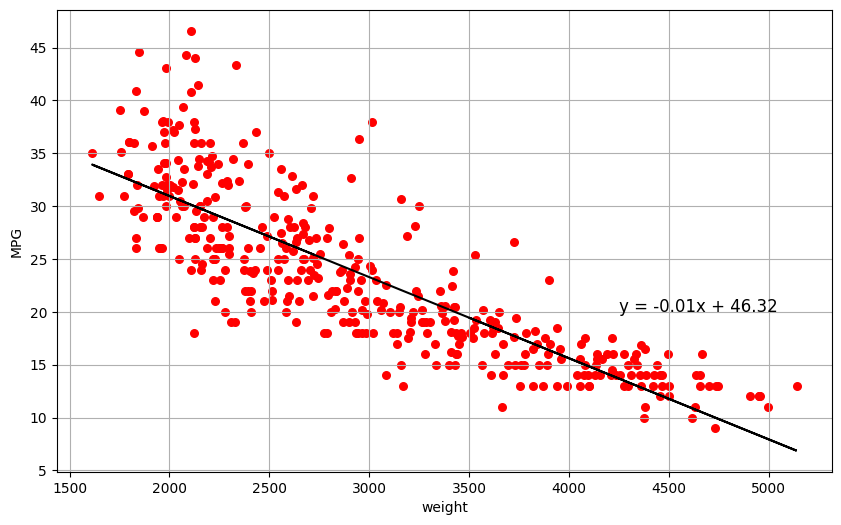

In [34]:


# Generar la línea de regresión

regression_line = W[0] + W[1]*Xw

# Trazar la línea de regresión

plt.figure(figsize=(10, 6))
plt.scatter(Xw,y, s=30, c='red')
plt.plot(Xw, regression_line, label='Línea de regresión', color='black')  # Línea de regresión

# Añadir la fórmula en la gráfica

ecuation = f"y = {W[1].item():.2f}x + {W[0].item():.2f}"  # Formato con 2 decimales
plt.text(4250, 20, ecuation, color='black', fontsize=12)  # Coordenadas y formato del texto
plt.xlabel('weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()



Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [35]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


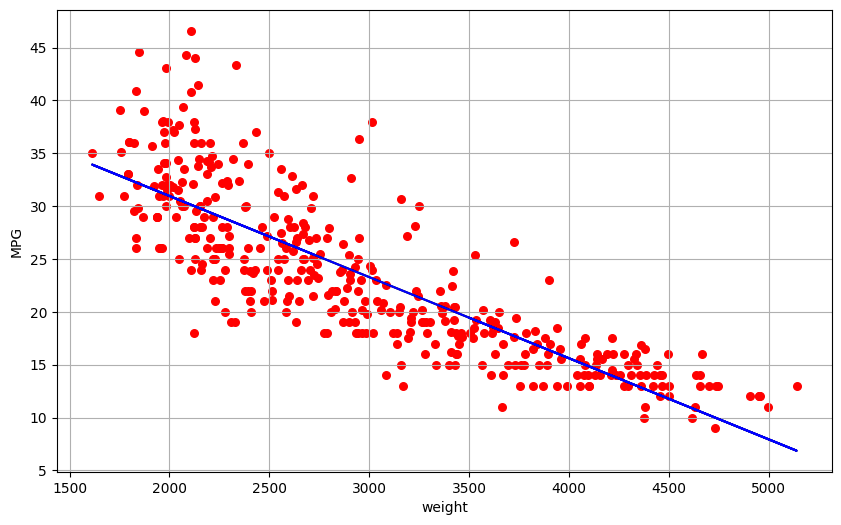

In [36]:
regression_line = W[0] + W[1]*Xw
regression_lineII = lr.intercept_ + lr.coef_*X_lr

plt.figure(figsize=(10, 6))
plt.scatter(Xw,y, s=30, c='red')
plt.plot(Xw, regression_line, label='Línea de regresión', color='black')  # Línea de regresión
plt.plot(X_lr, regression_lineII, label='Línea de regresión Sklearn', color='blue')
plt.xlabel('weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

Los dos métodos funcionan y dan el mismo resultado pero, el método de sklearn, es más sencillo , más rápido de escribir y , quizás, computacionalmente más eficiente porque no hay que calcular inversas explicitamente ni declarar funciones extra.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



A la hora de calcular los coeficientes, el método del gradiente puede ser más eficiente porque evita el cálculo de inversas y pseudoinversas, pero en funciones 

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

Iteración 0, Pérdida: 104232537854.668945
Iteración 1, Pérdida: 18356845290.691200
Iteración 2, Pérdida: 5493643895.851488
Iteración 3, Pérdida: 3390770560.285657
Iteración 4, Pérdida: 2916557527.598997
Iteración 5, Pérdida: 2721103695.636409
Iteración 6, Pérdida: 2596998914.343536
Iteración 7, Pérdida: 2506476839.057306
Iteración 8, Pérdida: 2438402135.116883
Iteración 9, Pérdida: 2386896901.874700
Iteración 10, Pérdida: 2347882159.717050
Iteración 11, Pérdida: 2318322112.607059
Iteración 12, Pérdida: 2295924556.336504
Iteración 13, Pérdida: 2278953852.739774
Iteración 14, Pérdida: 2266095072.482573
Iteración 15, Pérdida: 2256351912.375798
Iteración 16, Pérdida: 2248969472.299912
Iteración 17, Pérdida: 2243375761.273542
Iteración 18, Pérdida: 2239137379.004712
Iteración 19, Pérdida: 2235925935.978788
Iteración 20, Pérdida: 2233492609.852096
Iteración 21, Pérdida: 2231648866.715088
Iteración 22, Pérdida: 2230251853.500139
Iteración 23, Pérdida: 2229193329.737489
Iteración 24, Pérdida: 

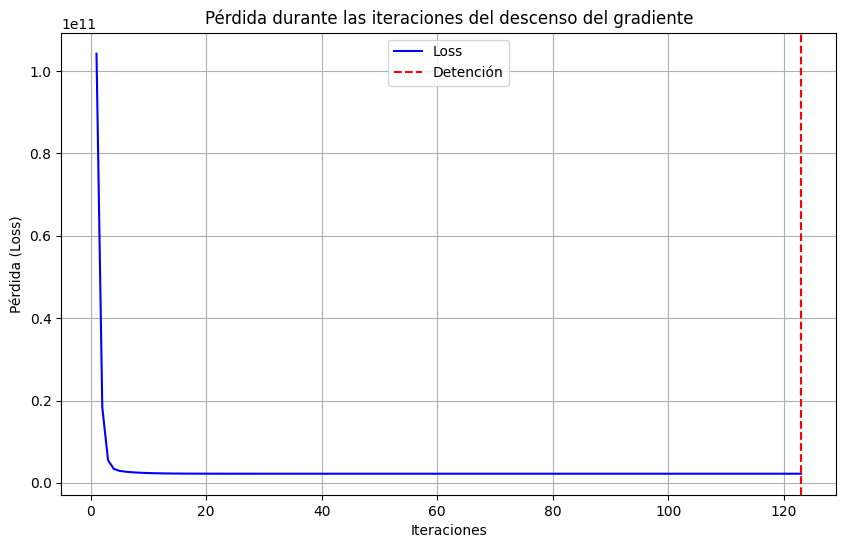

In [64]:
import numpy as np

def gradient_descent(X, y, w0, n_iter=1000, eta=0.001, tolerance=1e-6): 
    # Inicializamos variables
    loss_iter = [np.inf]
    w_iter = [w0] 
    w = w0
    
    # Añade la columna de 1s
    ones = np.ones((X.shape[0], 1))
    Xm = np.hstack((ones, X.reshape(-1, 1)))
    
    # Bucle para las iteraciones
    for i in range(n_iter):
        # Calcula predicciones y error
        y_hat = np.dot(Xm, w)  # ŷ = Xm * w
        error = y_hat - y      # error = ŷ - y
        loss = (1/2) * np.dot(error.T, error).item()  # RSS en i

        # Verifica valores de divergencia
        if np.isinf(loss) or np.isnan(loss):
            print("Divergencia detectada. Deteniendo...")
            break

         # Cálculo del gradiente 
        grad_rss = np.dot(Xm.T, error)  # gradRSS = Xm.T * (ŷ - y)


        # Condición de detención cuando loss no mejora sustancialmente.
        if abs(loss_iter[-1] - loss) < tolerance:
            print("Convergencia alcanzada en iteración", i)
            break

        w = w - eta * grad_rss  # Actualización de pesos
        w_iter.append(w)  # Agregar los nuevos pesos a la lista
        loss_iter.append(loss)  # Agregar el error a la lista        
        
        print(f"Iteración {i}, Pérdida: {loss:.6f}")
       
    return np.array(w_iter), np.array(loss_iter)


# Datos de ejemplo
eta = 0.1  
iteraciones = 3000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2, 1))

ye = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5, 1))
Xe = np.array([[0.37020659], [-0.48234664], [0.51483616], [0.38352774], [1.29888065]])

# Ejecutar la función
weights, loss = gradient_descent(Xe, ye, w0, iteraciones, eta, tolerance=1e-6)

# Último valor de los pesos y la pérdida
print("Último w:", weights[-1].T)
print("Última pérdida:", loss[-1])

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss)), loss, label='Loss', color='blue')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida (Loss)')
plt.title('Pérdida durante las iteraciones del descenso del gradiente')
plt.axvline(len(loss) - 1, color='red', linestyle='--', label='Detención')
plt.legend()
plt.grid(True)
plt.show()


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [49]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

Iteración 0, Pérdida: 199.000000
Iteración 1, Pérdida: 197.906353
Iteración 2, Pérdida: 196.821394
Iteración 3, Pérdida: 195.745054
Iteración 4, Pérdida: 194.677265
Iteración 5, Pérdida: 193.617958
Iteración 6, Pérdida: 192.567067
Iteración 7, Pérdida: 191.524524
Iteración 8, Pérdida: 190.490264
Iteración 9, Pérdida: 189.464219
Iteración 10, Pérdida: 188.446326
Iteración 11, Pérdida: 187.436519
Iteración 12, Pérdida: 186.434734
Iteración 13, Pérdida: 185.440907
Iteración 14, Pérdida: 184.454976
Iteración 15, Pérdida: 183.476877
Iteración 16, Pérdida: 182.506548
Iteración 17, Pérdida: 181.543928
Iteración 18, Pérdida: 180.588954
Iteración 19, Pérdida: 179.641568
Iteración 20, Pérdida: 178.701707
Iteración 21, Pérdida: 177.769313
Iteración 22, Pérdida: 176.844326
Iteración 23, Pérdida: 175.926687
Iteración 24, Pérdida: 175.016338
Iteración 25, Pérdida: 174.113221
Iteración 26, Pérdida: 173.217278
Iteración 27, Pérdida: 172.328453
Iteración 28, Pérdida: 171.446689
Iteración 29, Pérdida: 1

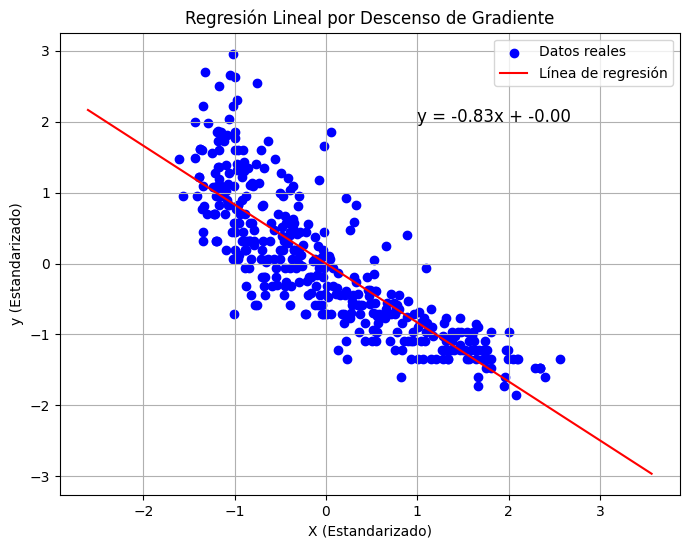

In [65]:
# Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x e y

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy().reshape((X.shape[0], 1))

X_gd = (X_np - X_np.mean()) / X_np.std()
y_gd = (y_np - y_np.mean()) / y_np.std()


# 1 Punto inicial y learning rate
np.random.seed(123)
w0 = np.zeros((2, 1))
eta = 0.00001
iteraciones = 3000

# 2 Aplicamos el algoritmo

weights, loss = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)

print("Últimos pesos:", weights[-1].T)
print("Última pérdida:", loss[-1])

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# 3 Dibuja la gráfica

w_final = weights[-1]  # Últimos pesos aprendidos
X_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)  # Rango de valores para X
X_range_with_bias = np.hstack((np.ones((X_range.shape[0], 1)), X_range))  # Agregar la columna de 1s
y_pred = np.dot(X_range_with_bias, w_final)  # Predecir valores de y

plt.figure(figsize=(8, 6))
plt.scatter(X_gd, y_gd, color='blue', label='Datos reales')  # Puntos originales
plt.plot(X_range, y_pred, color='red', label='Línea de regresión')  # Línea ajustada
ecuation = f"y = {w_final[1].item():.2f}x + {w_final[0].item():.2f}" 
plt.text(1, 2, ecuation, color='black', fontsize=12)  # Coordenadas y formato del texto
plt.xlabel('X (Estandarizado)')
plt.ylabel('y (Estandarizado)')
plt.title('Regresión Lineal por Descenso de Gradiente')
plt.legend()
plt.grid(True)
plt.show()
